# Resumo, Teoria e Prática - Metódo da Bisseção
> Autor: Gil Miranda<br>
> Contato: gilsmneto@gmail.com<br>
> Repo: http://www.gilmiranda.me<br>
> GitHub: [@mirandagil](https://github.com/mirandagil)<br>
> Fontes bibliográficas:
   * http://www.im.ufrj.br/bernardofpc/cursos/cientificaI/2017/Semana2-Parte2-Bissecao.ipynb
   
`last update: 12/10/2018`

In [99]:
import numpy as np
import matplotlib.pyplot as plt

### Teorema de Bolzano (caso particular do Teorema do Valor Intermediário)

Seja $f$ uma função contínua $f: [a,b]\rightarrow\mathbb{R}$ e $f(a) < 0 < f(b) $ então existe $z \in [a,b] $ tal que $f(z) = 0$<br>
<span style="color: #f2cf4a; font-family: Babas; font-size: .8em;">
`Referência: SPIVAK, M. 1967 Calculus. p. 100. Theorem 1.`
</span>

---
Vejamos o caso abaixo, onde<br>$f(x) = x^5 - 2$<br> $a = \frac{1}{2}$ e $b = \frac{3}{2}$<br>
O teorema garante que existe $ z = \sqrt[5]{2}$ tal que $f(z) = 0$

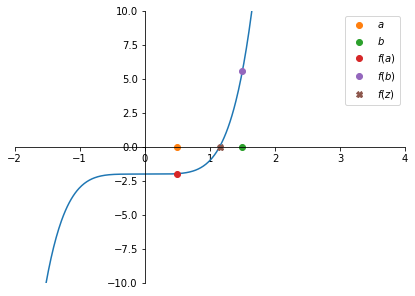

In [54]:
def f(x):
    return x**5-2

a = 1/2
b = 3/2
z = 2**(1/5)

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(7,5))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))
ax.set_ylim(-10,10)
ax.set_xlim(-2,4)

x = np.arange(-2,10,0.01)
ax.plot(x,f(x))
ax.plot(a,0,'o',label='$a$')
ax.plot(b,0,'o', label='$b$')
ax.plot(a,f(a),'o',label='$f(a)$')
ax.plot(b,f(b),'o', label='$f(b)$')
ax.plot(z,f(z),'X',label='$f(z)$')

ax.legend(loc='best')

O metódo da bisseção consiste em, utilizando o Teorema de bolzano, ou T.V.I., determinar $z$, ou uma boa aproximação para $z$ ou um intervalo suficientemente pequeno que contenha $z$

O método é feito da seguinte maneira:<br>
1. Determinar um intervalo $[a,b]$ tal que $f(a) \cdot f(b) < 0$ e que contenha uma raíz de $f$
2. Tomar $m = \frac{a+b}{2}$
3. Testar onde está $z$
    * $f(a)\cdot f(b) < 0 \implies z \in [a,m]$
    * $f(a)\cdot f(b) > 0 \implies z \in [m,b]$
    * $f(a)\cdot f(b) = 0 \implies z = a $ ou $ z = b$
4. Repetir os passos até o intervalo ser suficientemente pequeno

### Oh o bicho vindo, montando o algoritmo da bisseção 

Dividiremos o algoritmo em duas partes que juntas completam o metódo da bisseção.<br>
A primeira parte `bissection_step(f,a,b)` recebe a função e um dado intervalo que contenha a raíz, e retorna um intervalo dividido ao meio, ou seja, faz um passo da bisseção.<br>
A segunda parte `bissection` fará a iteração do metódo até o intervalo ser satisfatoriamente pequeno, ou encontrar a raíz exata.<br>
Essa divisão se torna importante pois assim podemos criar mais de uma maneira de fazer a bisseção, sendo iterativa ou recursiva.<br>

###### bissection_step

In [58]:
def bissection_step(f, a, b):
    if (f(a)*f(b)) > 0:
        print('ERRO! O dado intervalo [' + str(a)+','+str(b)+'] não contém uma raíz.')
        return (a,b)
    else:
        m = (a+b)/2
        if(f(m) == 0):
            return (m,m)
        elif (f(a)*f(m) < 0):
            return (a,m)
        elif (f(m)*f(b) < 0):
            return (m,b)

##### bissection(f,a,b,tol,retsteps)

In [95]:
def bissection(f,a,b,tol=1e-6,count=0,retsteps=False):
    if (abs(b-a) <= tol):
        if (f((b+a)/2)) < f(b) and f((b+a)/2) < f(a):
            if (retsteps):
                return ((b+a)/2,count)
            else:
                return (b+a)/2
        elif (f(b)<f(a)):
            if (retsteps):
                return (b,count)
            else:
                return b
        else:
            if (retsteps):
                return (a,count)
            else:
                return a
    else:
        a, b = bissection_step(f, a, b)
        count += 1
        return bissection(f, a, b, tol, count, retsteps)

Aplicando o metódo para encontrar a raíz do exemplo
$f = x^5 - 2$

In [98]:
raiz, c = bissection(f,a,b,retsteps=True, tol=1e-10)
assert (z-raiz < 1e-10)
(z,raiz,z-raiz, c)

(1.148698354997035, 1.1486983549548313, 4.2203796013495776e-11, 34)